# Knowledge Graph Construction

In [1]:
# Importing the required libraries.

import PyPDF2
import re
import glob
import yake
import seaborn as sns
from string import punctuation
from collections import Counter
from heapq import nlargest
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy import displacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Extraction of text from PDFs and making a corpus from single NASA record.

file = "C:/Users/vivek/Downloads/NTRS/CDMS_records/19690031423.pdf"
fileReader = PyPDF2.PdfFileReader(open(file, "rb"))
pdf_text = ''
count = 0
count = fileReader.numPages
while count >= 0:
    count -= 1
    pageObj = fileReader.getPage(count)
    text = pageObj.extractText()
    pdf_text = pdf_text + text
print(pdf_text)

Xref table not zero-indexed. ID numbers for objects will be corrected.


When all the  possible  error  sources  in the experiment  are  considered,  the only error  source  that  can  affect  the  physical  measurements of the  diffraction  pattern  when 
the object is stationary is the  location of the  zeros on the  microdensitometer  traces. The  conclusion 
is that the observed  radical  changes  in  the  physical  dimensions of the diffraction  patterns 
are due  solely  to  object  motion. It is further  concluded  that a close correlation  exists  between  the  observed  changes  in  physical  dimensions  and  the  changes predicted by this  study.  The  purpose 
of this  study  was  to  establish  the  existence of the correlation;  future  studies  can,  no  doubt,  refine  the  technique  used  in  this  study. 
CONCLUSIONS 
This  study  has  shown  that  it is possible  to  use  the  in-line  Fraunhofer  scheme  to form 
a continuous-exposure  hologram of an  object  in  motion.  The  study  has  also given  an  expression  for  the  recorded  f

In [3]:
nlp = spacy.load('en_core_web_sm')
text = nlp(pdf_text)

In [4]:
def getSentences(text):
    nlp = English()
    nlp.add_pipe('sentencizer')
    document = nlp(text)
    return [sent.text.strip() for sent in document.sents]

def printToken(token):
    print(token.text, "--->", token.dep_)

def appendChunk(original, chunk):
    return original + ' ' + chunk

def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)

def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        # printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''
    print (subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())

def processSentence(sentence):
    tokens = nlp_model(sentence)
    return processSubjectObjectPairs(tokens)

In [5]:
def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])
    pos = nx.spring_layout(G, k=0.5)
    plt.figure(4,figsize=(20,20))
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=600, node_color='lightblue', alpha=1,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()

In [6]:
if __name__ == "__main__":
    text = text
    sentences = getSentences(text)
    nlp_model = spacy.load('en_core_web_sm')
    triples = []
    for sentence in sentences:
        triples.append(processSentence(sentence))

sources source that object location , possible only physical be , experiment measurements pattern zeros traces
conclusion changes , be observe radical physical , dimensions patterns motion
It correlation , conclude close observe physical by , changes dimensions study
purpose studies , future refine , study existence correlation technique study
CONCLUSIONS it , show continuous , line scheme hologram object motion
study , give record , expression pattern
expression which , show record , effect motion fringes geometry
 , man Aeronautics , 
 , DeVelis , Holography
 , Co. , 
 , Parrent , 
 , Society 3 , Engineers
 , 57 , 
 , parrent , 
 , on , Fraunhofer
 , Patterns Coherent , Opaque ground
Acta , pp , 
 , 183 , 
 , 4 , 
 , stroke , 
 , introduction , Optics
 , Press , 
 , 5 , 
 , thompson , Opaque
 , Society 53 6 Powell , Engineers Reconstruction
 , Opt , 
 , Am . , 
 , pp , 
 , 1593 , 
Langley I , s-220 , 
 , i.11 , 
 , I , 
 , I , 
 , I , 
 , I I , 
 , I I , 
 , I1 , 
 , I , 
 , I , 
 , 

I derivation problem , ordinary diffract due be , circumstances field q plane field plane
treatment objective object , ment occupy many , problem study field plane object motion positions time
symmetry , usual remove by optical , problem object axis figure
physics , understand , problem field summation number sources principle
field Conditions observer , differential be I1 IIllIlI constant , plane plane right hole object field amplitude
 , amplitude , K 0
O wave tions D(x , assume boundary condi- I y , plane problem K aperture function
field superposition , linear use , 
This , enable simple single complex , solution problems problem
x , represent , sum field
 , br(x entire , aperture
definitions , follow require , field
object , center , origin plane E.
object which , same object , origin x'y'-plane displacement sy plane field y
 , = , 
field , total electromagnetic amplitude , 
part Reference systems , due due make follow , field + Superscript analysis 1
system object , center , tran

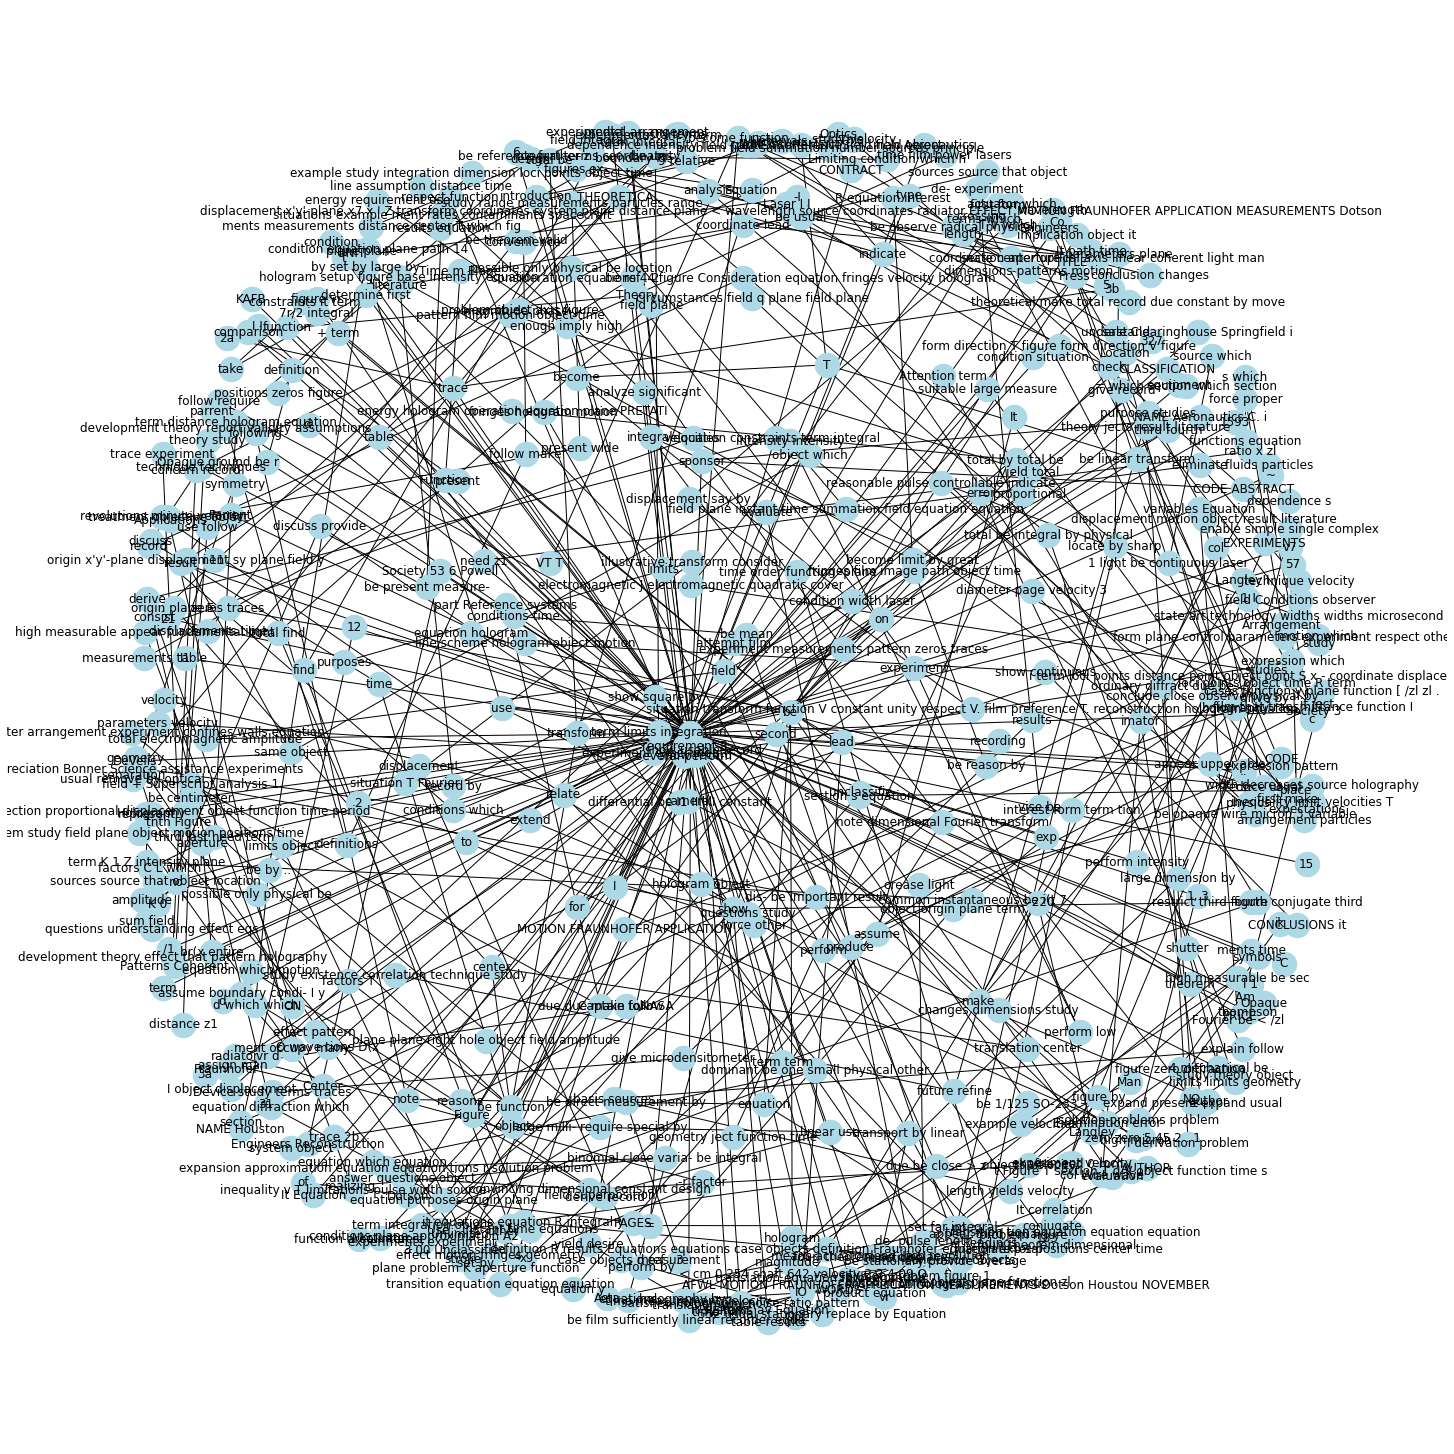

In [7]:
# Generation of Knowledge Graph for the entire document. 
    
printGraph(triples)